<a href="https://colab.research.google.com/github/pavel195/THBD/blob/main/analyz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

# Загрузите набор данных, чтобы увидеть его структуру
file_path = 'data/passengers.csv'
passengers_data = pd.read_csv(file_path)

# Отобразите первые несколько строк набора данных, чтобы понять его структуру
passengers_data.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


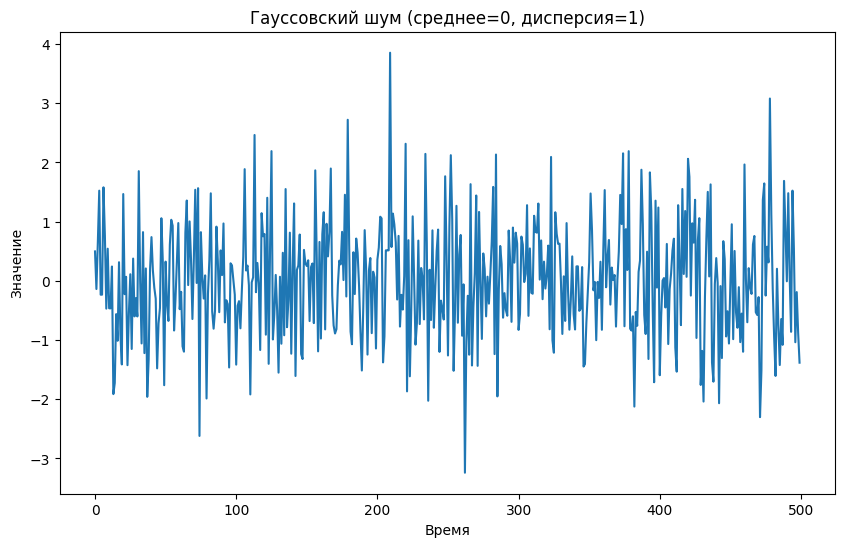

0.0

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Задача 1a: Генерация гауссовского шума
np.random.seed(42)  # Для воспроизводимости
gaussian_noise = np.random.normal(0, 1, 500)

# Задача 1b: Построение графика шума
plt.figure(figsize=(10, 6))
plt.plot(gaussian_noise)
plt.title("Гауссовский шум (среднее=0, дисперсия=1)")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.show()

# Задача 1c: Проведение теста Дики-Фуллера (ADF) на гауссовском шуме
adf_test_result_noise = adfuller(gaussian_noise)
adf_p_value_noise = adf_test_result_noise[1]

adf_p_value_noise


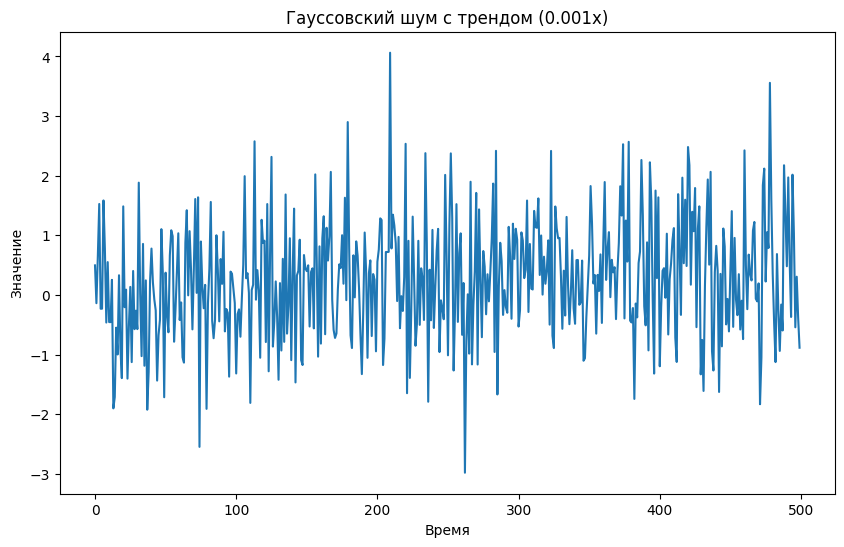

0.0

In [14]:
# Задача 2a: Добавьте тренд 0.001x к гауссовскому шуму
trend = 0.001 * np.arange(500)
noisy_trend = gaussian_noise + trend

# Задача 2b: Построение временного ряда с трендом
plt.figure(figsize=(10, 6))
plt.plot(noisy_trend)
plt.title("Гауссовский шум с трендом (0.001x)")
plt.xlabel("Время")
plt.ylabel("Значение")
plt.show()

# Задача 2c: Проведение теста Дики-Фуллера (ADF) на зашумленном ряде с трендом
adf_test_result_trend = adfuller(noisy_trend)
adf_p_value_trend = adf_test_result_trend[1]

adf_p_value_trend


In [15]:
!pip install ace_tools

In [16]:
import pandas as pd

# Задача 3a: Разделите набор данных на 3 части
passengers_data['#Passengers'] = passengers_data['#Passengers'].astype(float)

# Разделите данные на 3 равные части
split_index = len(passengers_data) // 3
part_1 = passengers_data['#Passengers'][:split_index]
part_2 = passengers_data['#Passengers'][split_index:2*split_index]
part_3 = passengers_data['#Passengers'][2*split_index:]

# Вычислите среднее и дисперсию для каждой части
mean_1, var_1 = part_1.mean(), part_1.var()
mean_2, var_2 = part_2.mean(), part_2.var()
mean_3, var_3 = part_3.mean(), part_3.var()

means_variances = pd.DataFrame({
    'Часть': ['1-я', '2-я', '3-я'],
    'Среднее': [mean_1, mean_2, mean_3],
    'Дисперсия': [var_1, var_2, var_3]
})

# Отобразите DataFrame с помощью стандартной функции print
print("Средние значения и дисперсии пассажирских данных:")
print(means_variances)


Средние значения и дисперсии пассажирских данных:
  Часть     Среднее    Дисперсия
0   1-я  158.375000  1094.664894
1   2-я  269.041667  3105.998227
2   3-я  413.479167  6161.999557


In [17]:
import numpy as np
import pandas as pd

# Задача 3b и 3c: Примените натуральный логарифм и снова разделите на 3 части
log_passengers = np.log(passengers_data['#Passengers'])

# Разделите данные после преобразования логарифмом на 3 равные части
part_1_log = log_passengers[:split_index]
part_2_log = log_passengers[split_index:2*split_index]
part_3_log = log_passengers[2*split_index:]

# Вычислите среднее и дисперсию для каждой части данных после преобразования логарифмом
mean_1_log, var_1_log = part_1_log.mean(), part_1_log.var()
mean_2_log, var_2_log = part_2_log.mean(), part_2_log.var()
mean_3_log, var_3_log = part_3_log.mean(), part_3_log.var()

means_variances_log = pd.DataFrame({
    'Часть': ['1-я', '2-я', '3-я'],
    'Среднее (Лог)': [mean_1_log, mean_2_log, mean_3_log],
    'Дисперсия (Лог)': [var_1_log, var_2_log, var_3_log]
})

# Отобразите DataFrame с помощью стандартной функции print
print("Средние значения и дисперсии логарифмированных данных пассажиров:")
print(means_variances_log)


Средние значения и дисперсии логарифмированных данных пассажиров:
  Часть  Среднее (Лог)  Дисперсия (Лог)
0   1-я       5.043911         0.042901
1   2-я       5.574733         0.040512
2   3-я       6.007884         0.033400


In [18]:
# Задача 3d: Проведение теста Дики-Фуллера (ADF) на исходном наборе данных
adf_test_result_original = adfuller(passengers_data['#Passengers'])
adf_p_value_original = adf_test_result_original[1]

# Задача 3e: Проведение теста Дики-Фуллера (ADF) на логарифмированном наборе данных
adf_test_result_log = adfuller(log_passengers)
adf_p_value_log = adf_test_result_log[1]

adf_p_value_original, adf_p_value_log


(0.991880243437641, 0.4223667747703874)